In [30]:
import sympy as sp
import numpy as np
from IPython.display import display, Math, HTML
import random
import os, sys
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
directoryPath = os.path.abspath(os.path.join('..\\libs'))

if directoryPath not in sys.path:
    sys.path.append(directoryPath)

In [3]:
import PythonStorybookLibs.Math.icons as mathIcons
import PythonStorybookLibs.Math.numbers as mathNumbers
import PythonStorybookLibs.output.html as htmlOutput

### Icons

In [44]:
icons = {
    0: '🎲',
    1: '🚗',
    2: '🦢',
    3: '🍺',
    4: '🛫',
    5: '🎒',
    6: '😈',
    7: '⛪',
    8: '🎱',
    9: '💍',
}

print(icons)

{0: '🎲', 1: '🚗', 2: '🦢', 3: '🍺', 4: '🛫', 5: '🎒', 6: '😈', 7: '⛪', 8: '🎱', 9: '💍'}


### Table

#### Matrix

In [5]:
def getAdditionTable():
    size = 10
    A = np.zeros([size, size], int)

    for row in range(size):
        for column in range(size):
            if row == 0:
                A[row, column] = column
                continue
            if column == 0:
                A[row, column] = row
                continue

            if row <= column:
                A[row, column] = row + column
    
    return np.flip(A, 0)

In [6]:
A = getAdditionTable()

display(Math(sp.latex(sp.sympify(A))))

<IPython.core.display.Math object>

#### Colors

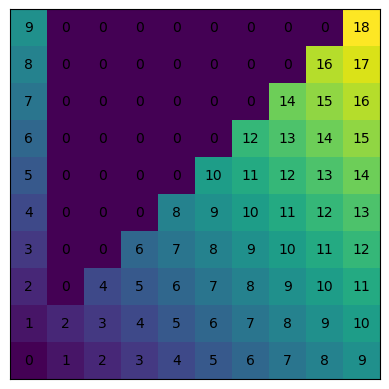

In [15]:
xLength, yLength = np.shape(A)

plt.imshow(A)

for i in range(xLength):
    for j in range(yLength):
        plt.text(j, i, A[i, j], horizontalalignment='center', verticalalignment='center')

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.show()

#### Icons

In [45]:
iconsTable = mathIcons.mapMatrixToIcons(A, icons)

display(HTML(htmlOutput.tableToHtml(iconsTable)))

💍,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🚗🎱
🎱,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🚗😈,🚗⛪
⛪,🎲,🎲,🎲,🎲,🎲,🎲,🚗🛫,🚗🎒,🚗😈
😈,🎲,🎲,🎲,🎲,🎲,🚗🦢,🚗🍺,🚗🛫,🚗🎒
🎒,🎲,🎲,🎲,🎲,🚗🎲,🚗🚗,🚗🦢,🚗🍺,🚗🛫
🛫,🎲,🎲,🎲,🎱,💍,🚗🎲,🚗🚗,🚗🦢,🚗🍺
🍺,🎲,🎲,😈,⛪,🎱,💍,🚗🎲,🚗🚗,🚗🦢
🦢,🎲,🛫,🎒,😈,⛪,🎱,💍,🚗🎲,🚗🚗
🚗,🦢,🍺,🛫,🎒,😈,⛪,🎱,💍,🚗🎲
🎲,🚗,🦢,🍺,🛫,🎒,😈,⛪,🎱,💍


### Terms variation

#### Dictionary

In [7]:
def getAdditionDictionary():
    size = 10
    dictionary = { key: [] for key in range((size + size)) }
    
    for key in dictionary:
        number = int(key)
        terms = mathNumbers.getTerms(number)
        dictionary[key].extend(terms)
    
    return dictionary

In [8]:
additionDictionary = getAdditionDictionary()

print(additionDictionary)

{0: [], 1: [], 2: [(1, 1)], 3: [(1, 2)], 4: [(1, 3), (2, 2)], 5: [(1, 4), (2, 3)], 6: [(1, 5), (2, 4), (3, 3)], 7: [(1, 6), (2, 5), (3, 4)], 8: [(1, 7), (2, 6), (3, 5), (4, 4)], 9: [(1, 8), (2, 7), (3, 6), (4, 5)], 10: [(1, 9), (2, 8), (3, 7), (4, 6), (5, 5)], 11: [(2, 9), (3, 8), (4, 7), (5, 6)], 12: [(3, 9), (4, 8), (5, 7), (6, 6)], 13: [(4, 9), (5, 8), (6, 7)], 14: [(5, 9), (6, 8), (7, 7)], 15: [(6, 9), (7, 8)], 16: [(7, 9), (8, 8)], 17: [(8, 9)], 18: [(9, 9)], 19: []}


#### Table

In [58]:
def dictionaryToMatrix(dictionary, inverseVertically: bool = False):
    keys = list(dictionary.keys())
    sizeX = 
    sizeY = len(keys)
    D = np.zeros([sizeX, sizeY], int)

    if inverseVertically:
        keys.reverse()
        
    for i, key in enumerate(keys):
        for j, column in enumerate(dictionary[key]):
            print(column, j)
            D[i, j] = reduce(lambda term1, term2: str(term1) + str(term2), column)
        
    return D

SyntaxError: invalid syntax (2325819581.py, line 3)

In [57]:
D = dictionaryToMatrix(additionDictionary)

display(Math(sp.latex(sp.sympify(D))))

0 0
1 1
2 2
(1, 1) 0
3 3
(1, 2) 0
4 4
(1, 3) 0
(2, 2) 1
5 5
(1, 4) 0
(2, 3) 1
6 6
(1, 5) 0
(2, 4) 1
(3, 3) 2
7 7
(1, 6) 0
(2, 5) 1
(3, 4) 2
8 8
(1, 7) 0
(2, 6) 1
(3, 5) 2
(4, 4) 3
9 9
(1, 8) 0
(2, 7) 1
(3, 6) 2
(4, 5) 3
10 10
(1, 9) 0
(2, 8) 1
(3, 7) 2
(4, 6) 3
(5, 5) 4
11 11
(2, 9) 0
(3, 8) 1
(4, 7) 2
(5, 6) 3
12 12
(3, 9) 0
(4, 8) 1
(5, 7) 2
(6, 6) 3
13 13
(4, 9) 0
(5, 8) 1
(6, 7) 2
14 14
(5, 9) 0
(6, 8) 1
(7, 7) 2
15 15
(6, 9) 0
(7, 8) 1
16 16
(7, 9) 0
(8, 8) 1
17 17
(8, 9) 0
18 18
(9, 9) 0
19 19


<IPython.core.display.Math object>

### To icons

#### Table

#### Dictionary

In [10]:
iconsAdditionDictionary = mathIcons.mapDictionaryWithNumberTermsToIcons(additionDictionary, icons)

display(HTML(htmlOutput.dictionaryToHtml(iconsAdditionDictionary, True)))

### Tests

In [11]:
def runTests(quantity = 1, maxLevel = 9):
    for i in range(0, quantity):
        numberToQuestion = random.randint(2, maxLevel)
        terms = getNumberTerms(numberToQuestion)
        randomIndex = random.randint(0, len(terms) - 1)
        termsToAsk = terms[randomIndex]
        isNotReversed = bool(random.getrandbits(1))
        num1 = termsToAsk[0] if isNotReversed else termsToAsk[1]
        num2 = termsToAsk[1] if isNotReversed else termsToAsk[0]
        
        answer = int(input('%s + %s equals to ' %(mapNumberToIcons(num1), mapNumberToIcons(num2))))
        
        if answer == numberToQuestion:
            print("True")
        else:
            print('False')

In [12]:
# runTests(3, 10)